In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time as t 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
t.time()

1639313775.789285

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/vehicle/vehicles_images"


In [6]:
batch_size = 64
img_height = 180
img_width = 180

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4361 files belonging to 4 classes.
Using 3053 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4361 files belonging to 4 classes.
Using 1308 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['bus', 'motorcycle', 'plane', 'train']


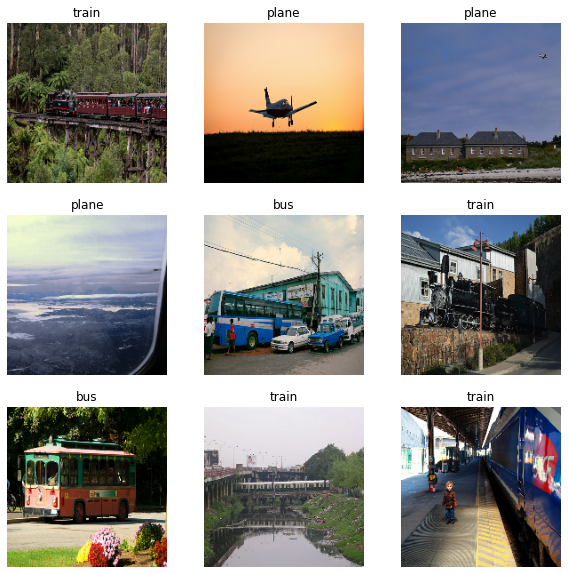

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = len(class_names)


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
start_time = t.time()
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
end_time = t.time()
time_to_train= end_time-start_time
print("it took this model",round(time_to_train,5), "seconds to train")

Epoch 1/10
48/48 [==============================] - 564s 4s/step - loss: 1.3099 - accuracy: 0.4114 - val_loss: 1.0791 - val_accuracy: 0.5680
Epoch 2/10
48/48 [==============================] - 96s 2s/step - loss: 1.0304 - accuracy: 0.5676 - val_loss: 0.9453 - val_accuracy: 0.6376
Epoch 3/10
48/48 [==============================] - 97s 2s/step - loss: 0.8877 - accuracy: 0.6417 - val_loss: 0.8150 - val_accuracy: 0.6896
Epoch 4/10
48/48 [==============================] - 97s 2s/step - loss: 0.7760 - accuracy: 0.6957 - val_loss: 0.7039 - val_accuracy: 0.7500
Epoch 5/10
48/48 [==============================] - 97s 2s/step - loss: 0.6307 - accuracy: 0.7615 - val_loss: 0.6300 - val_accuracy: 0.7752
Epoch 6/10
48/48 [==============================] - 97s 2s/step - loss: 0.5152 - accuracy: 0.8192 - val_loss: 0.5789 - val_accuracy: 0.8058
Epoch 7/10
48/48 [==============================] - 97s 2s/step - loss: 0.3743 - accuracy: 0.8680 - val_loss: 0.5437 - val_accuracy: 0.8326
Epoch 8/10
48/48 [=

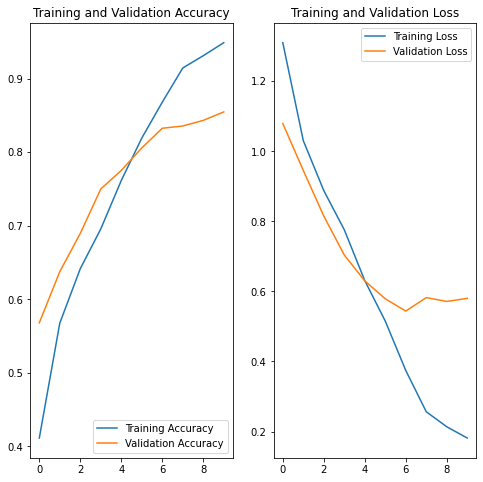

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

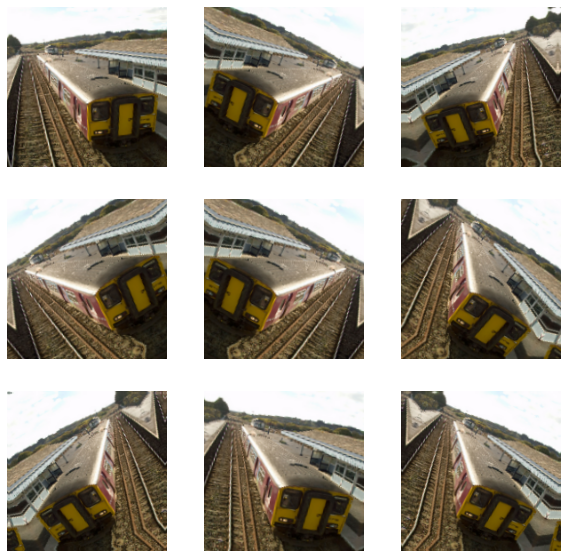

In [41]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [50]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [53]:
start_time = t.time()
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
end_time = t.time()
time_to_train= end_time-start_time
print("it took this model",round(time_to_train,5), "seconds to train")

Epoch 1/15
48/48 [==============================] - 114s 2s/step - loss: 1.3613 - accuracy: 0.3066 - val_loss: 1.2837 - val_accuracy: 0.4671
Epoch 2/15
48/48 [==============================] - 113s 2s/step - loss: 1.2137 - accuracy: 0.4582 - val_loss: 1.2813 - val_accuracy: 0.4419
Epoch 3/15
48/48 [==============================] - 113s 2s/step - loss: 1.1388 - accuracy: 0.5097 - val_loss: 1.2385 - val_accuracy: 0.5145
Epoch 4/15
48/48 [==============================] - 113s 2s/step - loss: 1.1009 - accuracy: 0.5303 - val_loss: 1.0339 - val_accuracy: 0.5948
Epoch 5/15
48/48 [==============================] - 113s 2s/step - loss: 1.0718 - accuracy: 0.5493 - val_loss: 1.2097 - val_accuracy: 0.5145
Epoch 6/15
48/48 [==============================] - 114s 2s/step - loss: 1.0438 - accuracy: 0.5601 - val_loss: 1.2307 - val_accuracy: 0.5245
Epoch 7/15
48/48 [==============================] - 113s 2s/step - loss: 1.0058 - accuracy: 0.5827 - val_loss: 1.0827 - val_accuracy: 0.5925
Epoch 8/15
48

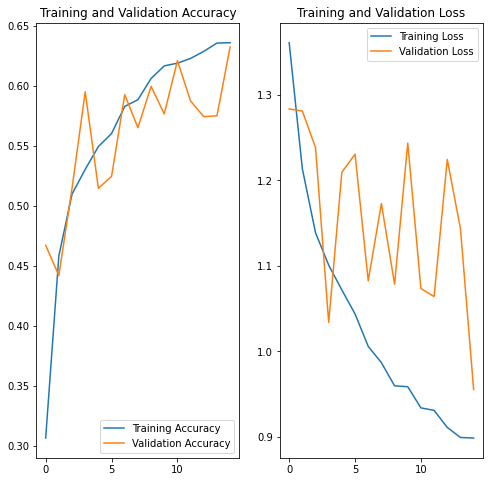

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
start_time = t.time()
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
end_time = t.time()
time_to_train= end_time-start_time
print("it took this model",round(time_to_train,5), "seconds to train")

Epoch 1/20
48/48 [==============================] - 115s 2s/step - loss: 1.3097 - accuracy: 0.3731 - val_loss: 1.1685 - val_accuracy: 0.4908
Epoch 2/20
48/48 [==============================] - 114s 2s/step - loss: 1.1975 - accuracy: 0.4491 - val_loss: 1.1525 - val_accuracy: 0.5130
Epoch 3/20
48/48 [==============================] - 114s 2s/step - loss: 1.1535 - accuracy: 0.4769 - val_loss: 1.0941 - val_accuracy: 0.5520
Epoch 4/20
48/48 [==============================] - 114s 2s/step - loss: 1.1208 - accuracy: 0.5067 - val_loss: 1.1817 - val_accuracy: 0.4595
Epoch 5/20
48/48 [==============================] - 114s 2s/step - loss: 1.0952 - accuracy: 0.5201 - val_loss: 1.1159 - val_accuracy: 0.5115
Epoch 6/20
48/48 [==============================] - 114s 2s/step - loss: 1.0705 - accuracy: 0.5352 - val_loss: 1.0436 - val_accuracy: 0.5436
Epoch 7/20
48/48 [==============================] - 114s 2s/step - loss: 1.0256 - accuracy: 0.5549 - val_loss: 1.2041 - val_accuracy: 0.5092
Epoch 8/20
48

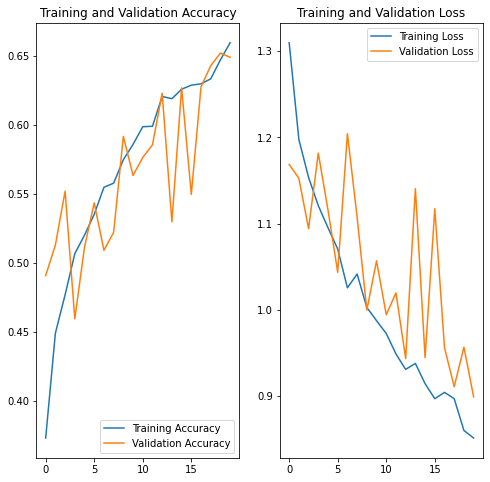

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
start_time = t.time()
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
end_time = t.time()
time_to_train= end_time-start_time
print("it took this model",round(time_to_train,5), "seconds to train")

Epoch 1/15
48/48 [==============================] - 90s 2s/step - loss: 1.2853 - accuracy: 0.4003 - val_loss: 1.1294 - val_accuracy: 0.5015
Epoch 2/15
48/48 [==============================] - 92s 2s/step - loss: 1.0835 - accuracy: 0.5447 - val_loss: 1.0712 - val_accuracy: 0.5428
Epoch 3/15
48/48 [==============================] - 90s 2s/step - loss: 0.9772 - accuracy: 0.6050 - val_loss: 0.9875 - val_accuracy: 0.5879
Epoch 4/15
48/48 [==============================] - 90s 2s/step - loss: 0.8735 - accuracy: 0.6551 - val_loss: 0.9612 - val_accuracy: 0.6200
Epoch 5/15
48/48 [==============================] - 90s 2s/step - loss: 0.7598 - accuracy: 0.7042 - val_loss: 1.0279 - val_accuracy: 0.6063
Epoch 6/15
48/48 [==============================] - 90s 2s/step - loss: 0.6923 - accuracy: 0.7288 - val_loss: 1.1065 - val_accuracy: 0.5795
Epoch 7/15
48/48 [==============================] - 90s 2s/step - loss: 0.5998 - accuracy: 0.7691 - val_loss: 1.0723 - val_accuracy: 0.6040
Epoch 8/15
48/48 [==

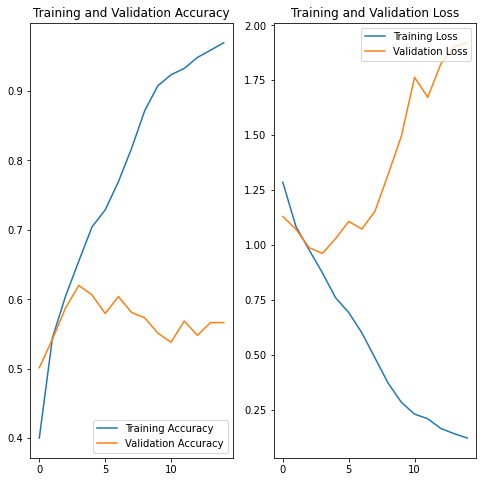

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
#testing on new images

test_image_path = "/content/a6ebc881-4f85-4a10-aaa0-b7a2f36f3253.jpeg"
image = tf.keras.utils.load_img(
    test_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to bus with a 84.67 percent confidence.


In [60]:
!pip install tf_explain
from tf_explain.core.grad_cam import GradCAM


     |████████████████████████████████| 43 kB 1.3 MB/s 


In [64]:

# Load a sample image 
test_img_path ="/content/drive/MyDrive/vehicle/vehicles_images/bus/124952.jpeg"
img = tf.keras.utils.load_img(
    test_img_path, target_size=(img_height, img_width)
)
img = tf.keras.utils.img_to_array(img)
data = ([img], None)

# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=0)  # 0 is the bus index 

explainer.save(grid, ".", "grad_cam1.png")
